# Replication of the European Commission Debt Sustainability Methodology

This notebook features an updated version of the replication code for the European Commission DSA methodology. The replication was first introduced in  the Buregel Working Paper ["A Quantitative Evaluation of the European Commission´s Fiscal Governance Proposal"](https://www.bruegel.org/working-paper/quantitative-evaluation-european-commissions-fiscal-governance-proposal) by Zsolt Darvas, Lennard Welslau, and Jeromin Zettelmeyer (2023). For details on the methodology and a guide to the features of the python code see "tutorial.ipynb". The sections below...
- Run the DSA for all EU countries,criteria, and safeguards, correcting for non-linearities and frontloading:
    - No-policy change, baseline adjustment, and adverse deterministic scenarios
    - The stochastic scenario
    - The debt sustainability safeguard
    - The deficit resilience safeguard (during and after the adjustment period)
    - The deficit-based EDP
- Plot and save results

All input data needed to run the model are pre-prepared and can be found in the data/InputData folder. Data sources in the "SOURCES.xlsx" file.

For comments and suggestions please contact lennard.welslau[at]gmail[dot]com. \
Last update: 01 June 2024

## Run DSA 

In [28]:
# Import libraries and modules
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Import DSA model class and stochastic subclass
from classes import *
from functions import *

# Set autoreleoad
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Define list of EU codes for the DSA loop
eu_codes = [
    'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 
    'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'
    ]
# Define adjustment periods for the DSA loop
adjustment_periods = [4, 7]

# Choose output folder (will create folder if it doesn't exist)
folder_name = 'june_update'
add_output_folder(folder_name)

# If there already is a results file in the folder, we can load it using load_results_dict
#results_dict = load_results_dict(folder_name)

# Initialize results dictionary
results_dict = create_results_dict(eu_codes)

In [34]:
# Call functions to run DSA, each instance is solved and saved as pickle on the hard drive
run_dsa(country_codes=eu_codes, 
        adjustment_periods=adjustment_periods, 
        results_dict=results_dict,
        folder_name=folder_name, 
        edp_countries=['BEL', 'FRA', 'ITA', 'HUN', 'MLT', 'POL', 'SVK', 'ROU'], # If EDP countries are specifed, EDP is only applied to those, else it is based on projected deficits
        edp=True, # If edp is set to False, EDP applies to no countries
        debt_safeguard=True, # If debt_safeguard is set to false, debt sustainability safeguard is not applied
        deficit_resilience=True # If deficit_resilience is set to false, deficit resilience safeguard is not applied
)

# Save SPB and dataframes as excel files
save_results(results_dict=results_dict, 
             folder_name=folder_name, 
             save_dfs=True
             )


... optimising AUT, 1 of 27, estimated remaining time: 0.0 minutes

                Model Params                            SPB Targets       
============================================     =========================
country                                  AUT     main_adjustment     0.187
adjustment period                          4     lower_spb           0.690
adjustment start                        2025     financial_stress    0.209
shock frequency                    quarterly     adverse_r_g         0.788
stochastic period                  2029-2034     deficit_reduction  -0.068
estimation                           normal      stochastic          0.663
bond level data                        False     binding             0.788
safeguards          debt, deficit_resilience                              
============================================     =========================

                              Binding Params                              
spb_steps                     

### Create country plots

Creating chart for AUT_4
Creating chart for AUT_7
Creating chart for BEL_4
Creating chart for BEL_7
Creating chart for BGR_4
Creating chart for BGR_7
Creating chart for HRV_4
Creating chart for HRV_7
Creating chart for CYP_4
Creating chart for CYP_7
Creating chart for CZE_4
Creating chart for CZE_7
Creating chart for DNK_4
Creating chart for DNK_7
Creating chart for EST_4
Creating chart for EST_7
Creating chart for FIN_4
Creating chart for FIN_7
Creating chart for FRA_4
Creating chart for FRA_7
Creating chart for DEU_4
Creating chart for DEU_7
Creating chart for GRC_4
Creating chart for GRC_7
Creating chart for HUN_4
Creating chart for HUN_7
Creating chart for IRL_4
Creating chart for IRL_7
Creating chart for ITA_4
Creating chart for ITA_7
Creating chart for LVA_4
Creating chart for LVA_7
Creating chart for LTU_4
Creating chart for LTU_7
Creating chart for LUX_4
Creating chart for LUX_7
Creating chart for MLT_4
Creating chart for MLT_7
Creating chart for NLD_4
Creating chart for NLD_7


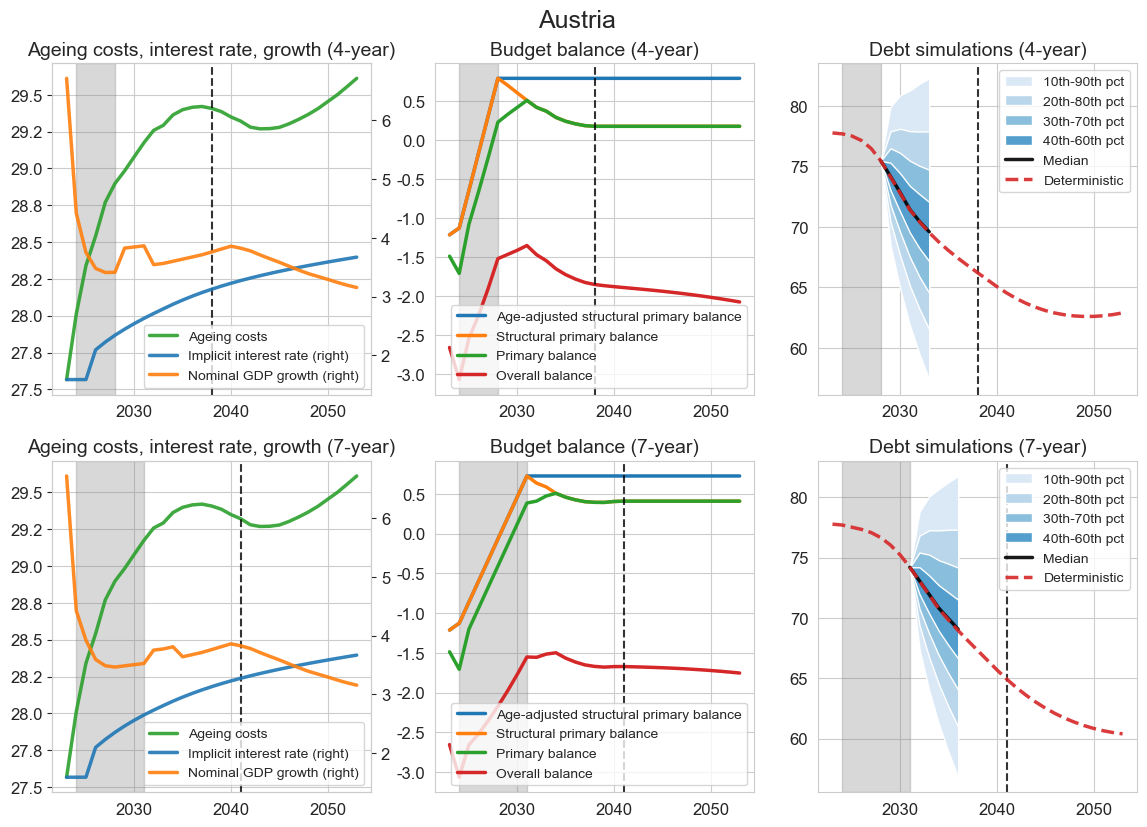

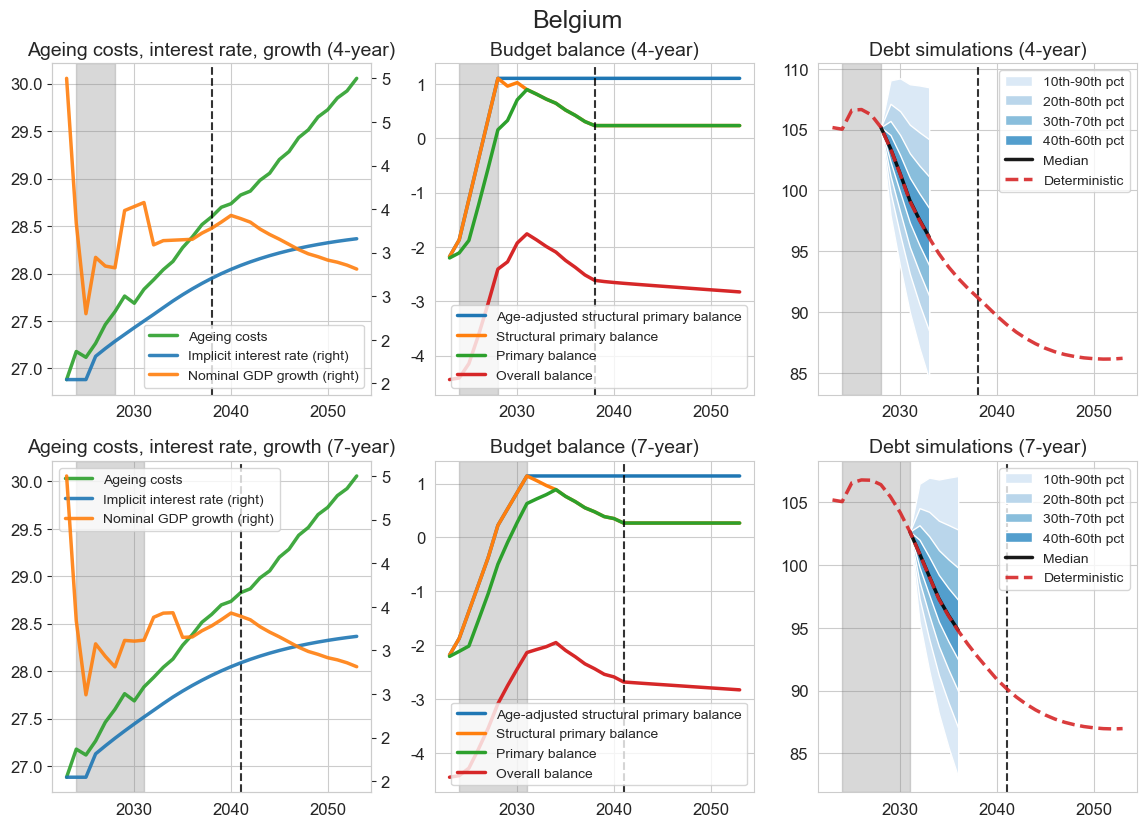

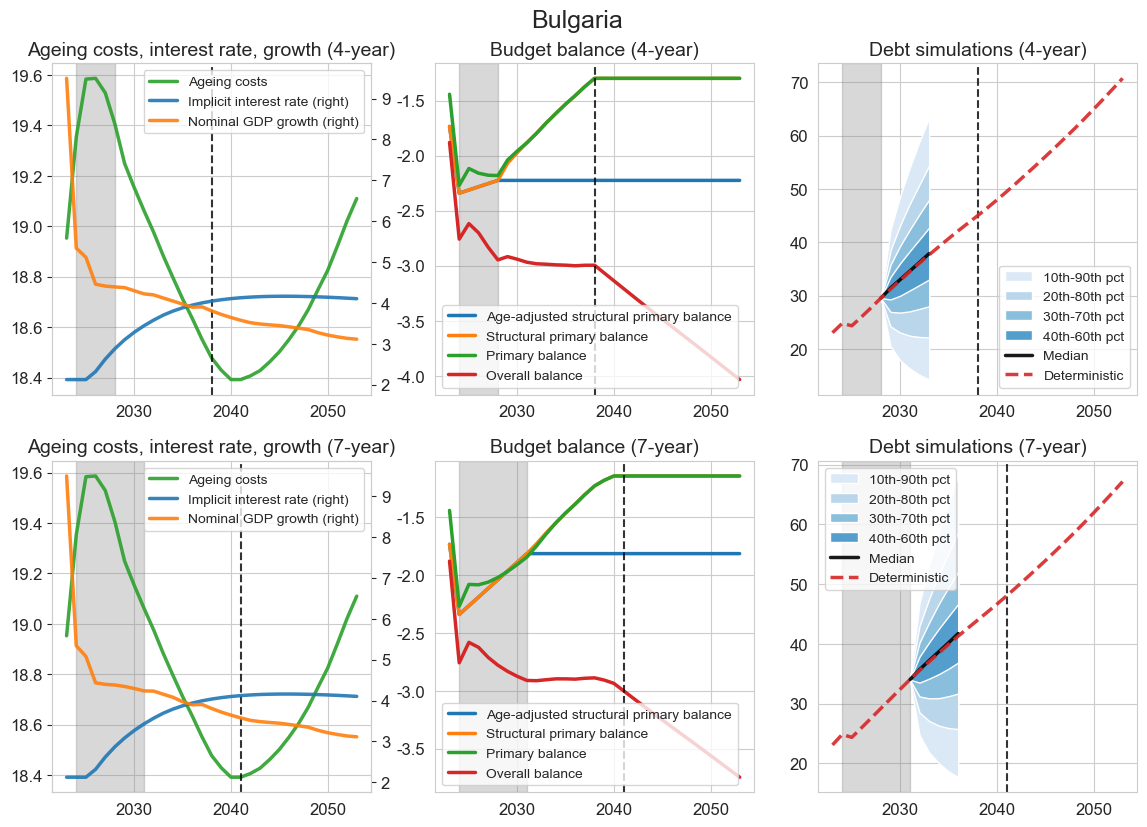

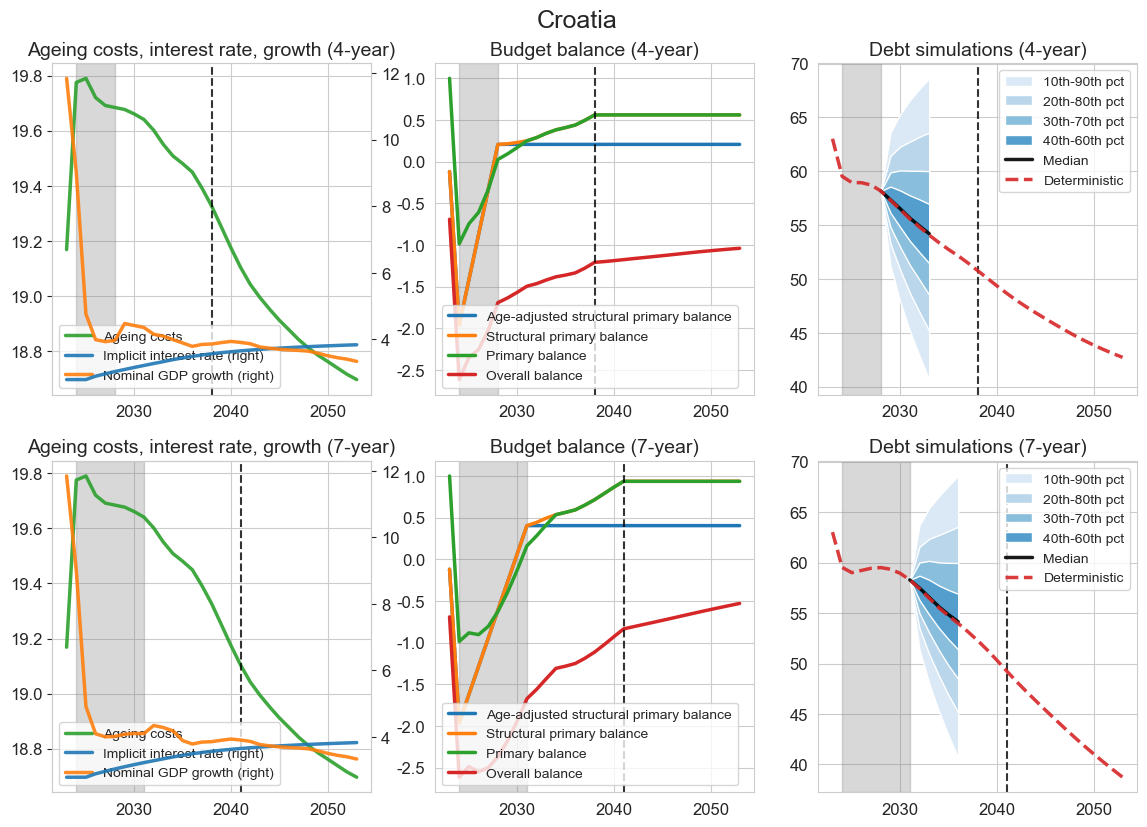

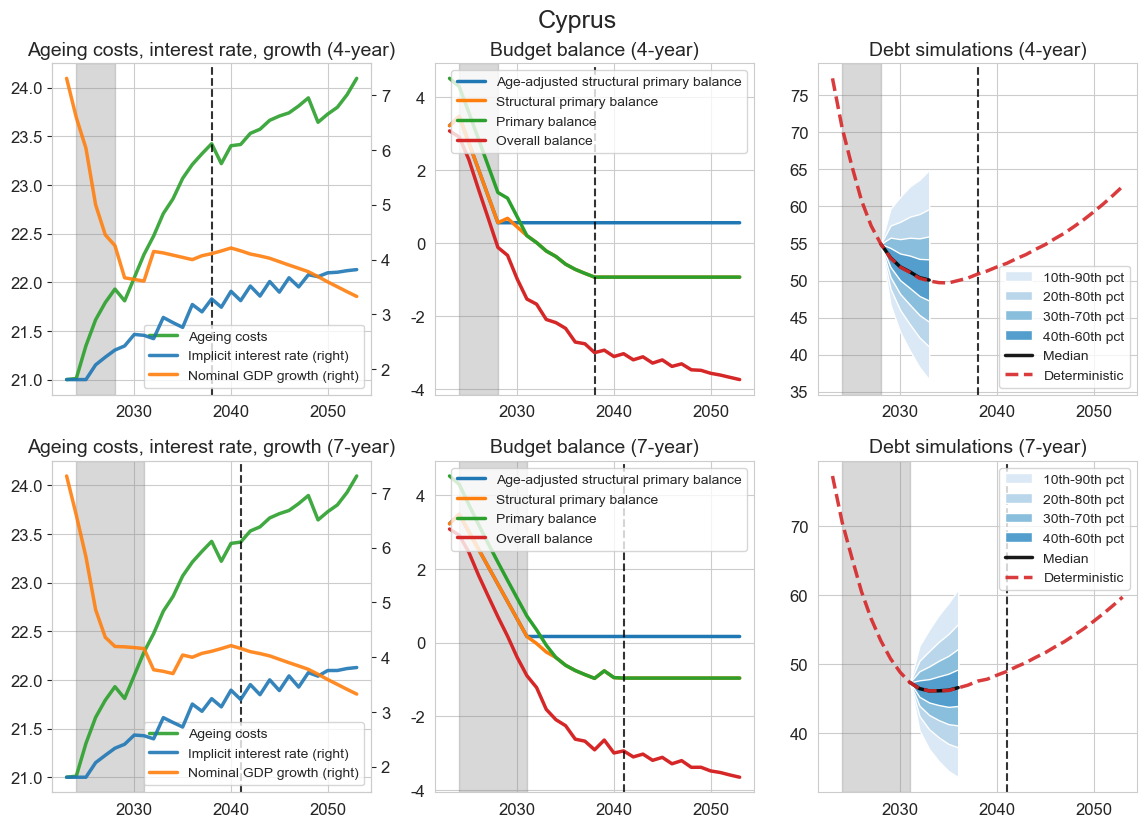

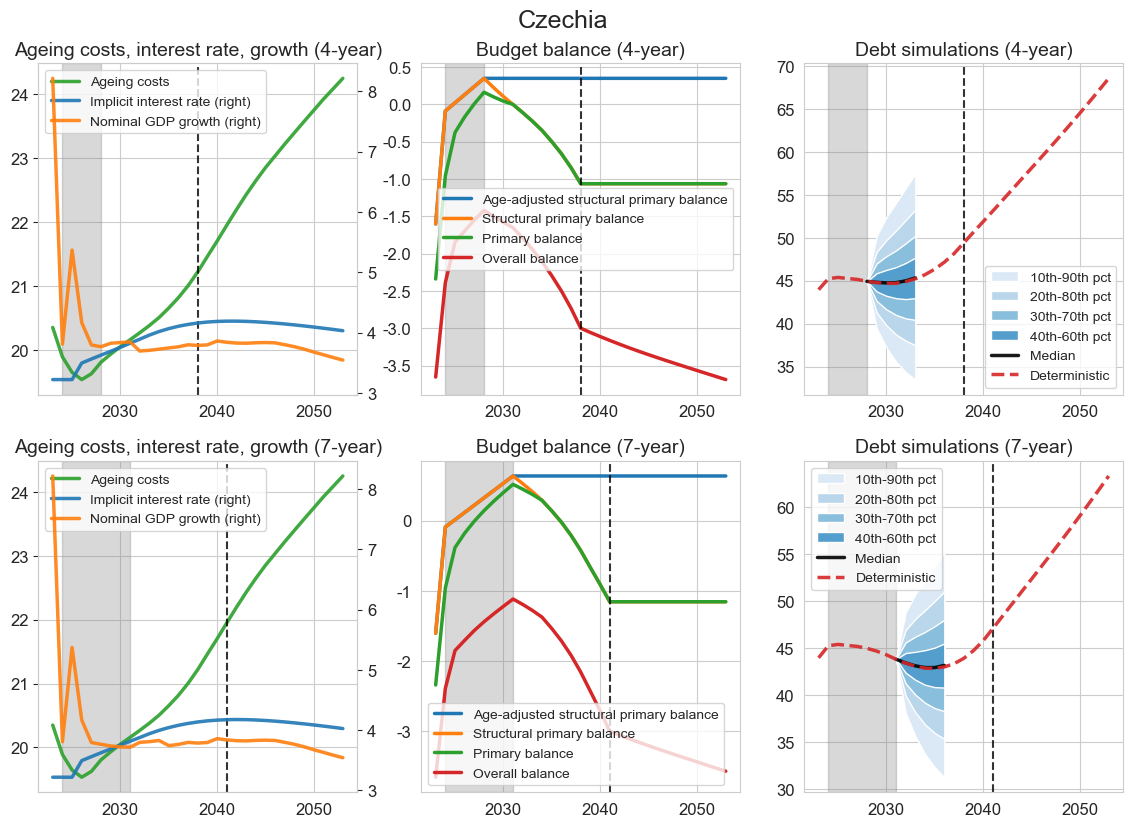

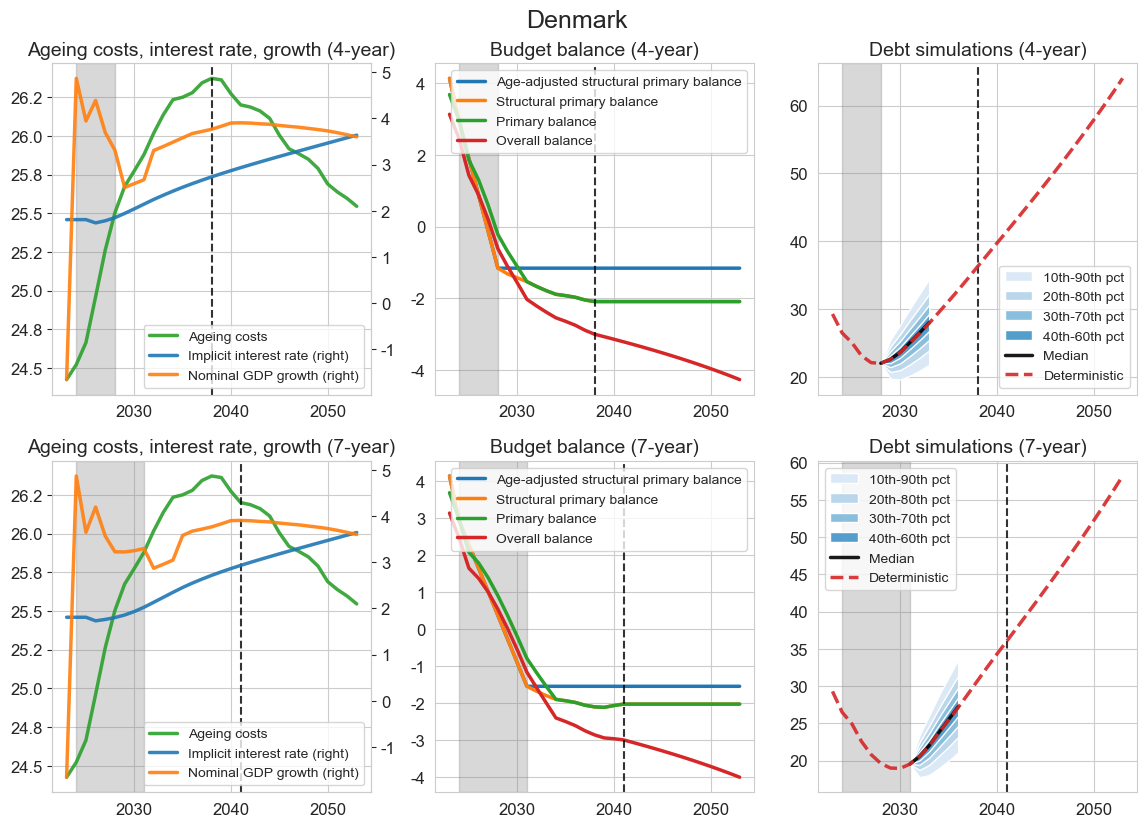

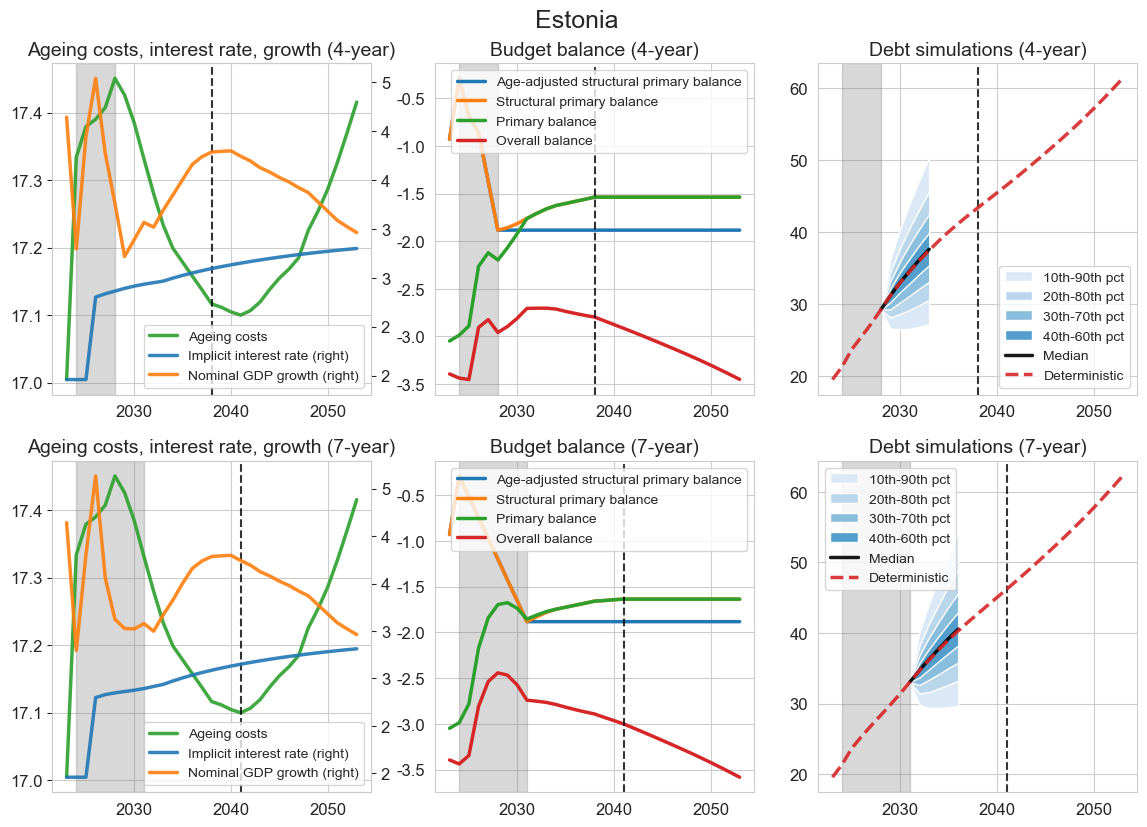

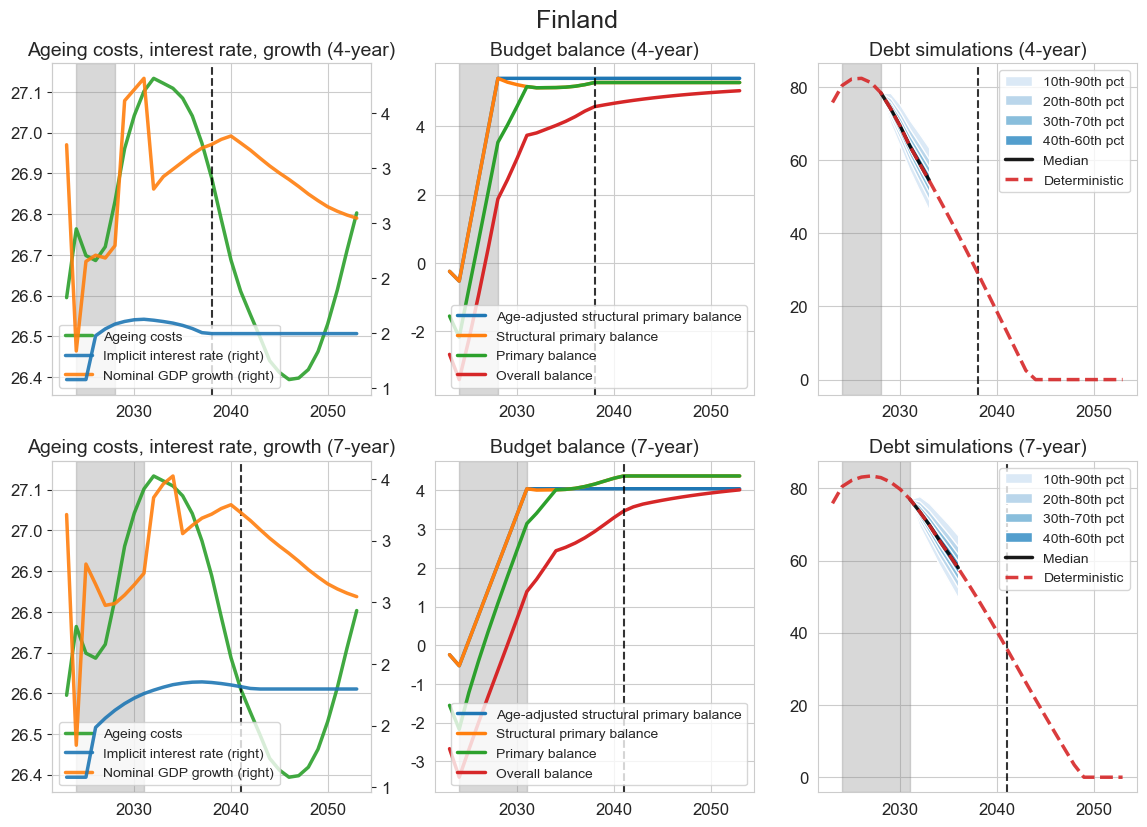

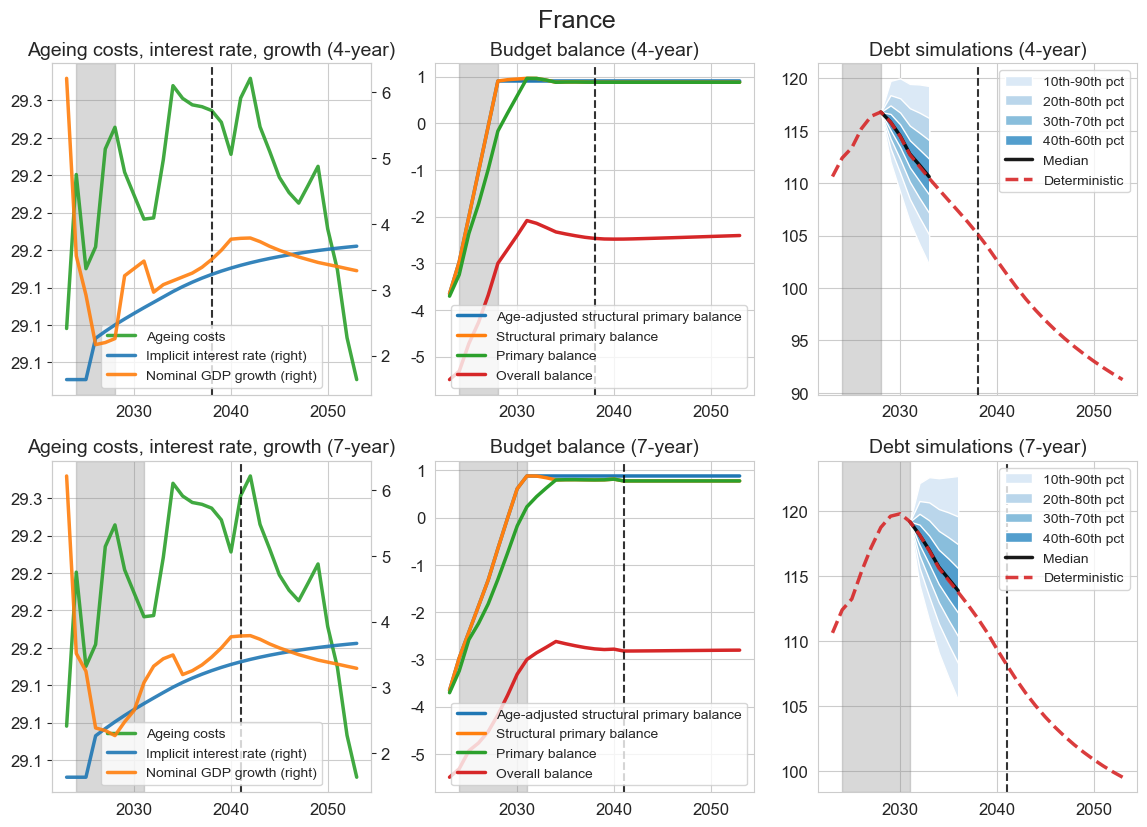

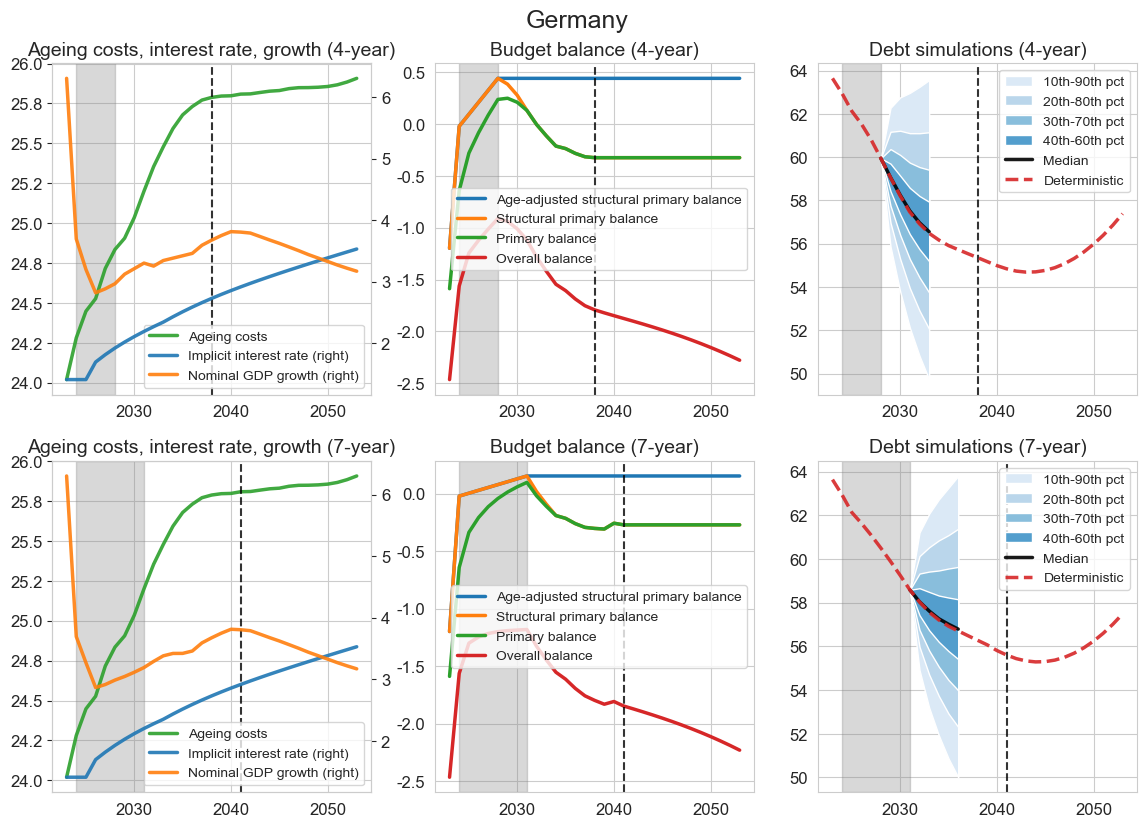

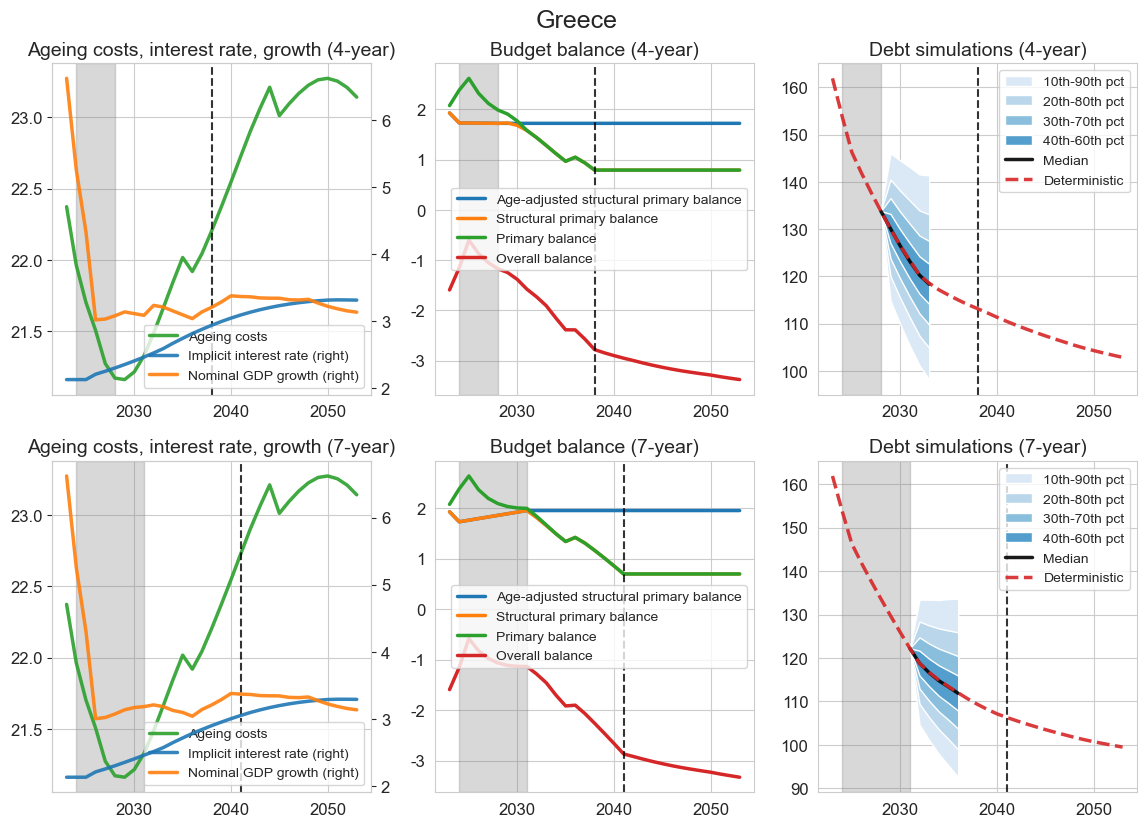

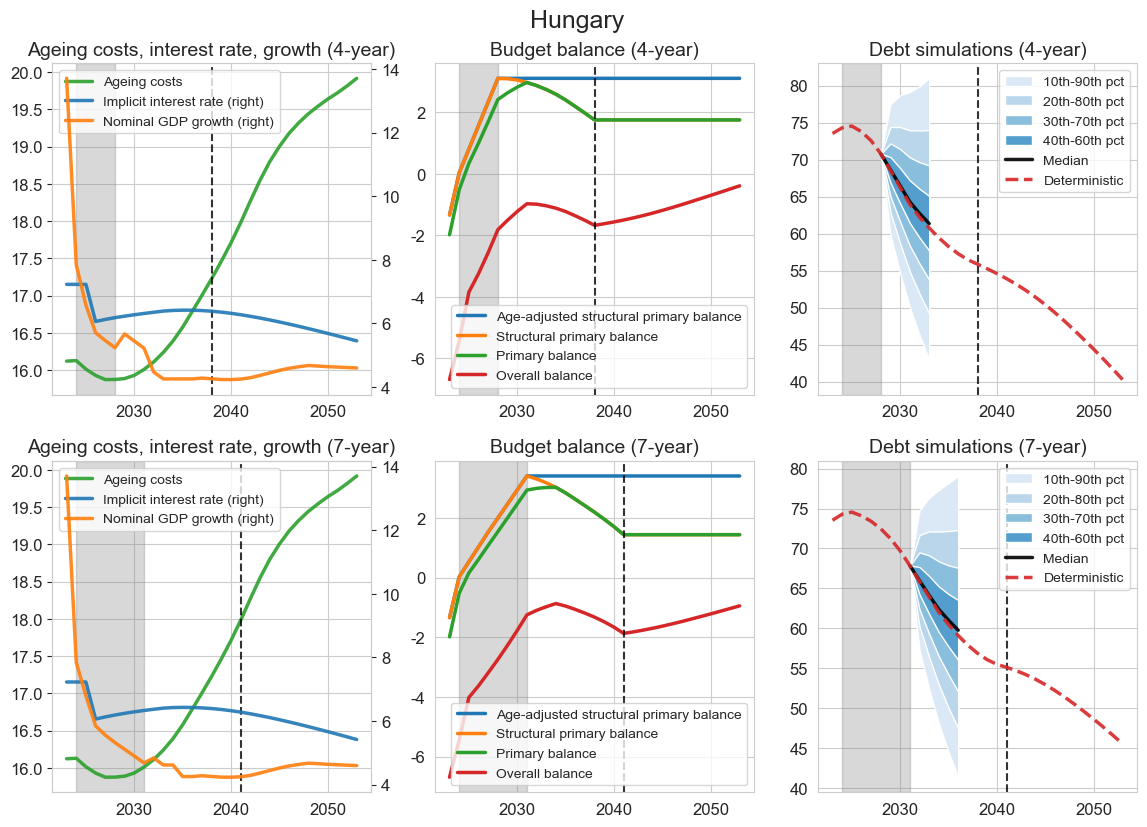

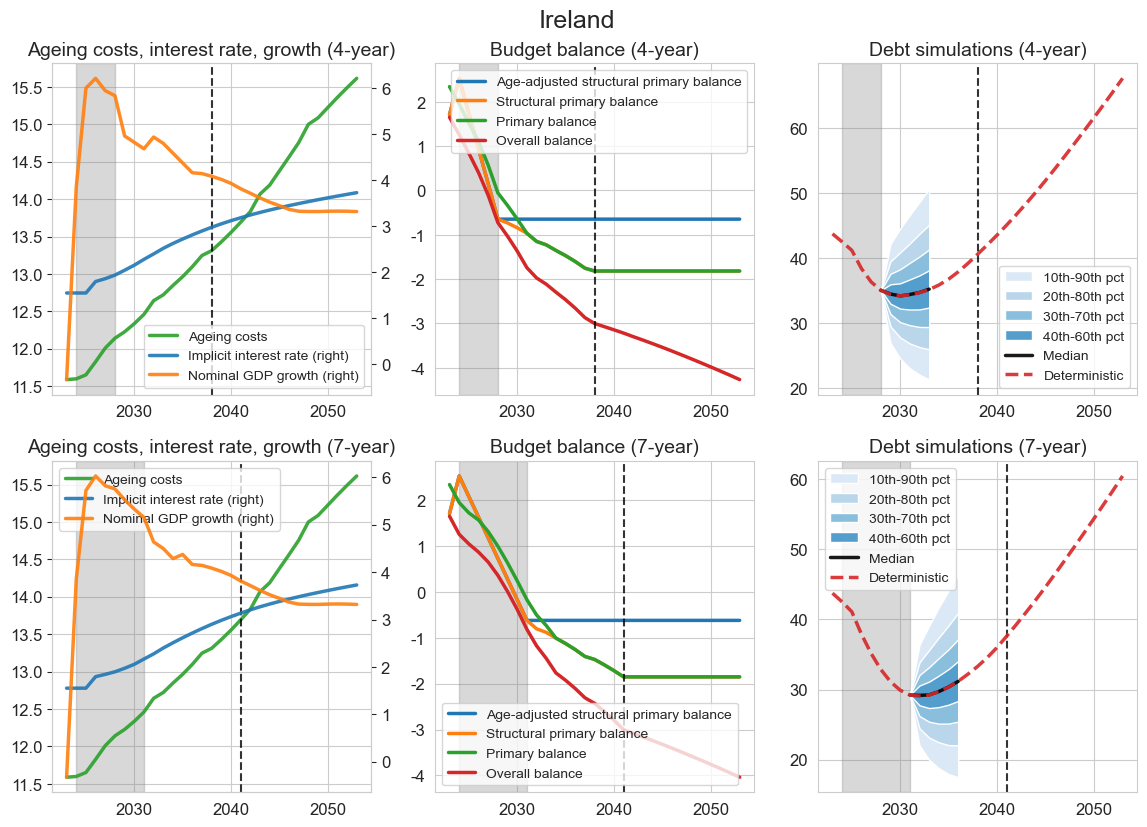

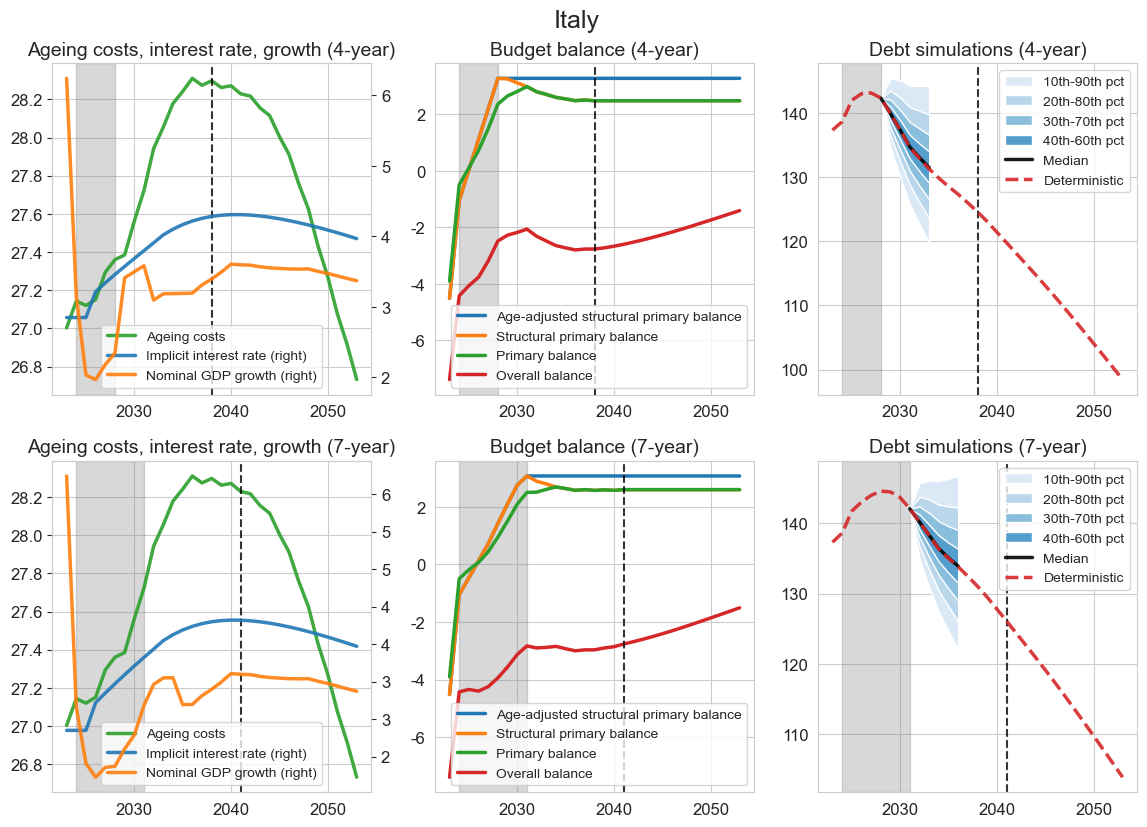

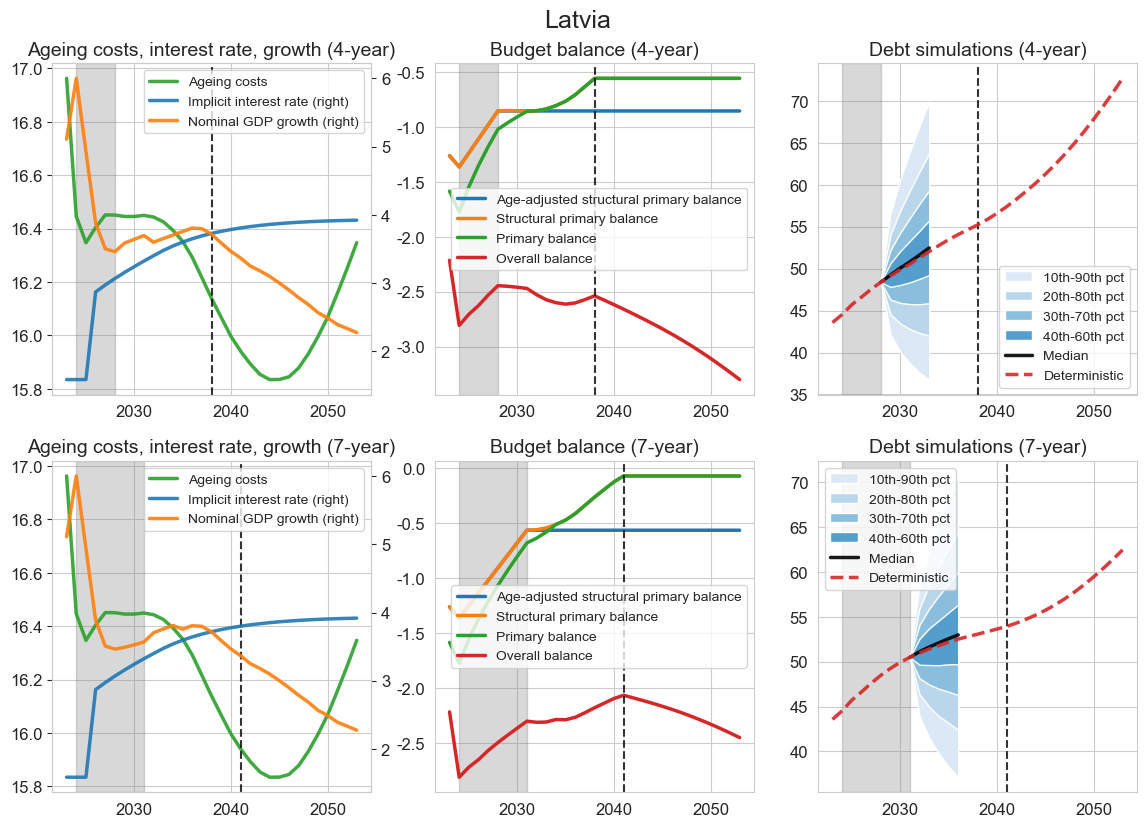

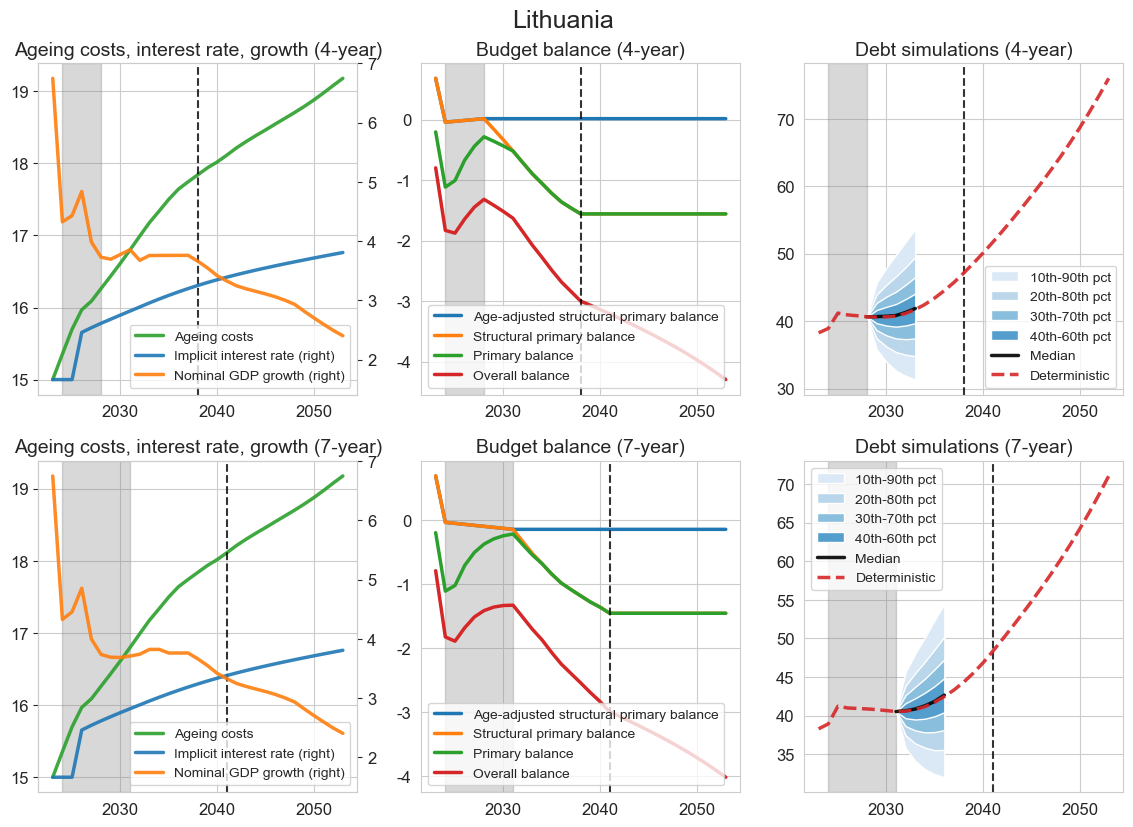

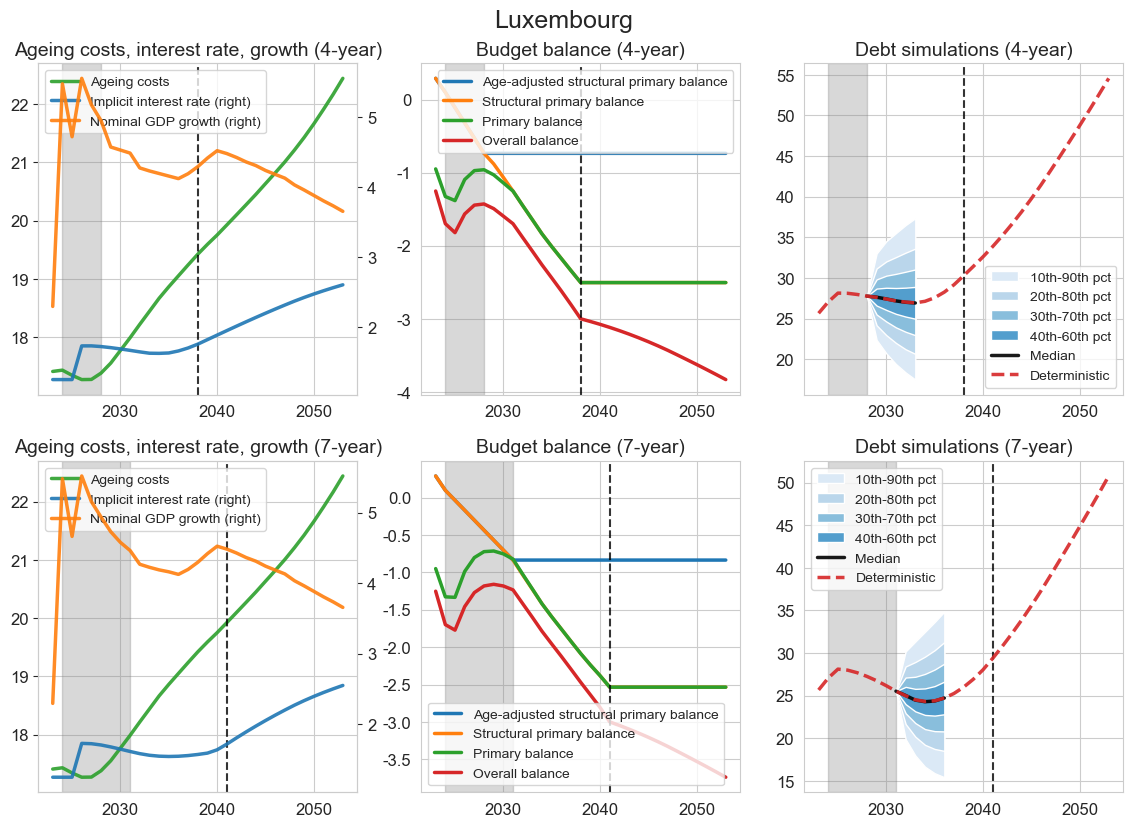

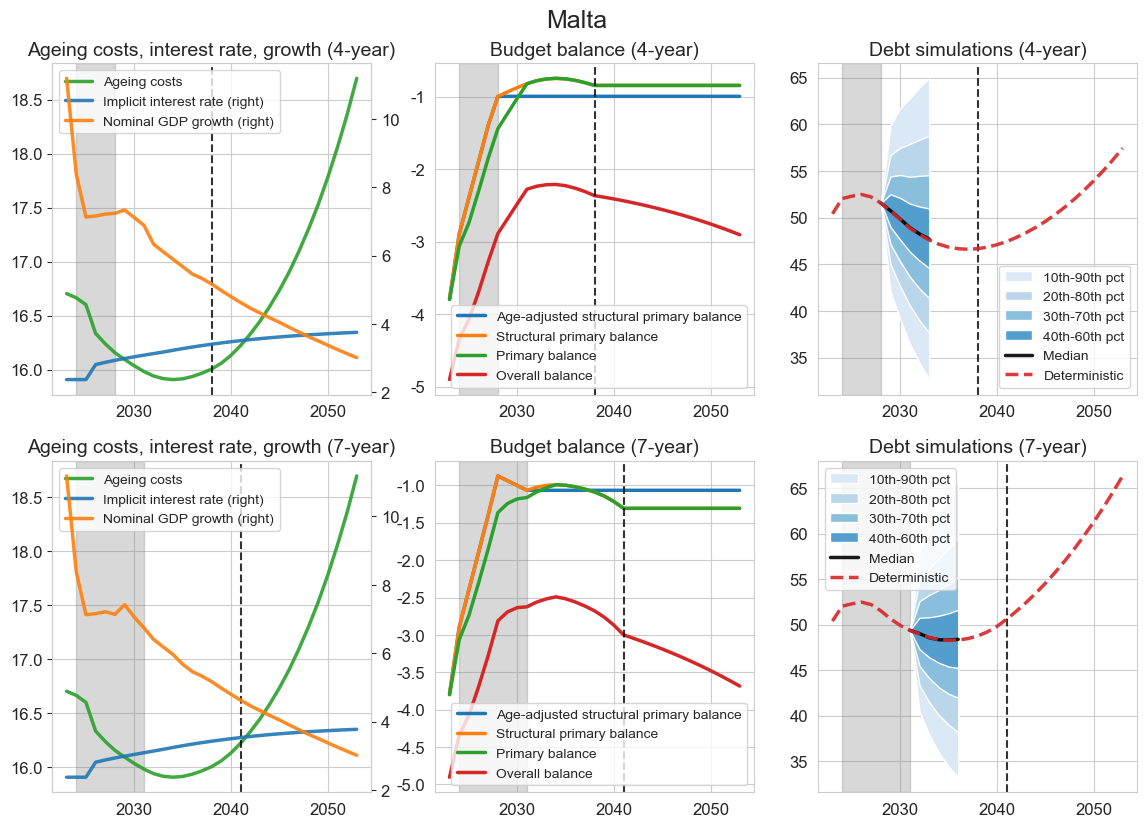

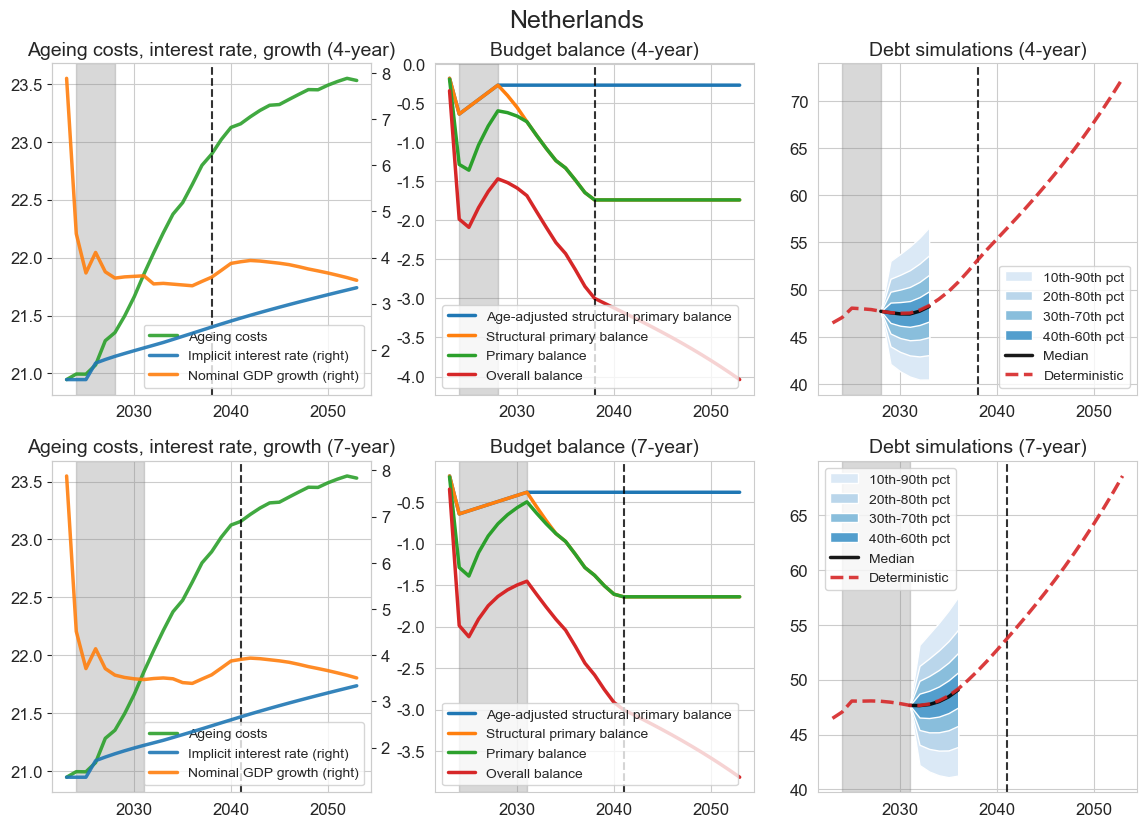

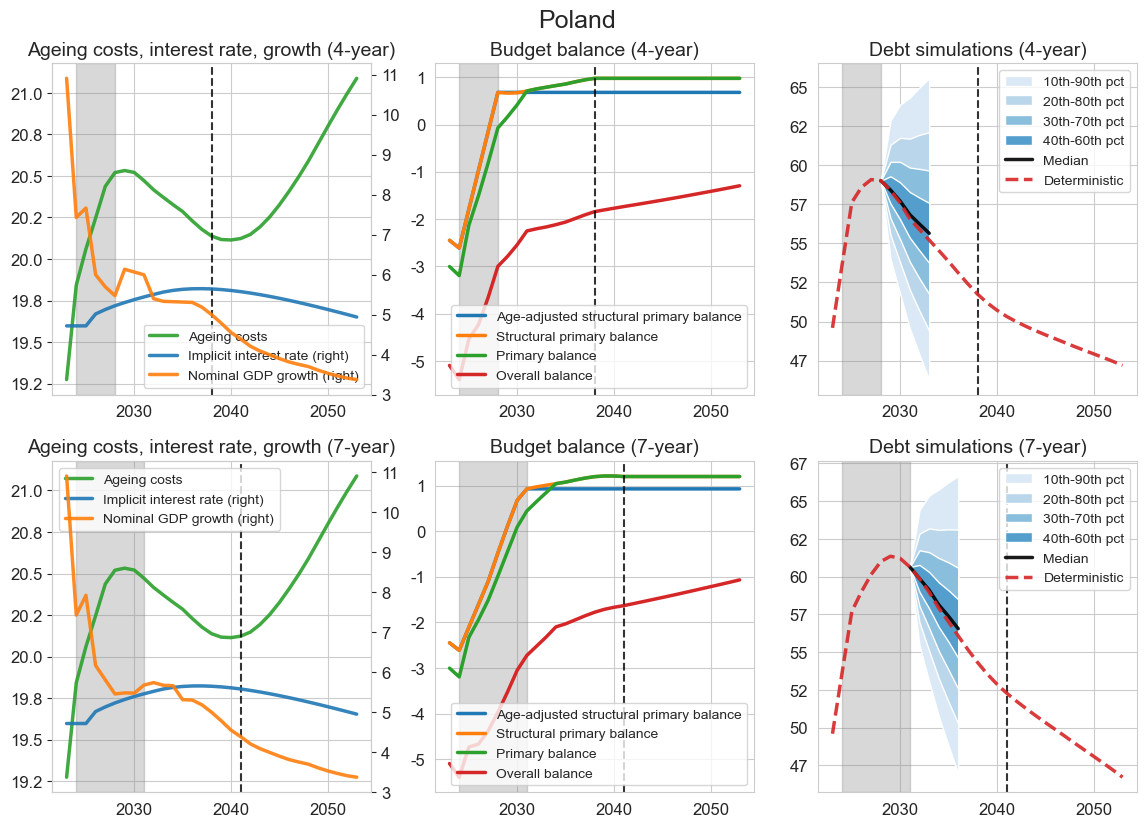

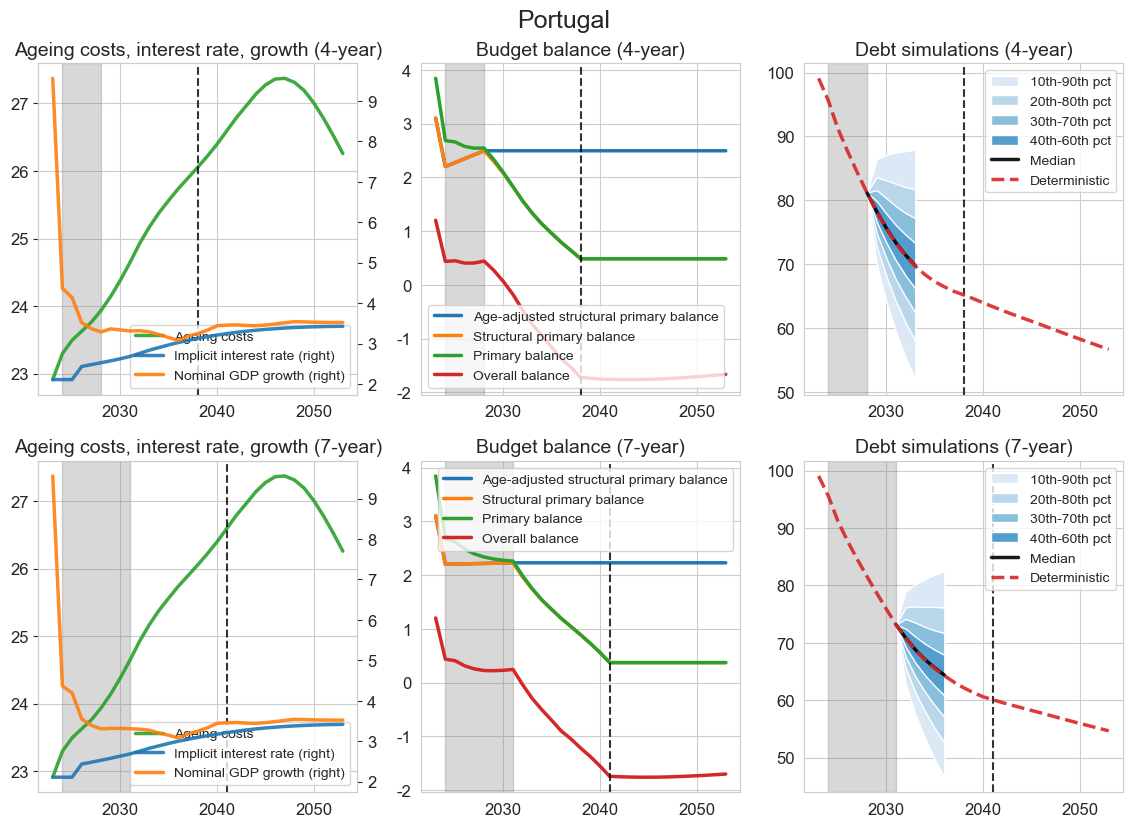

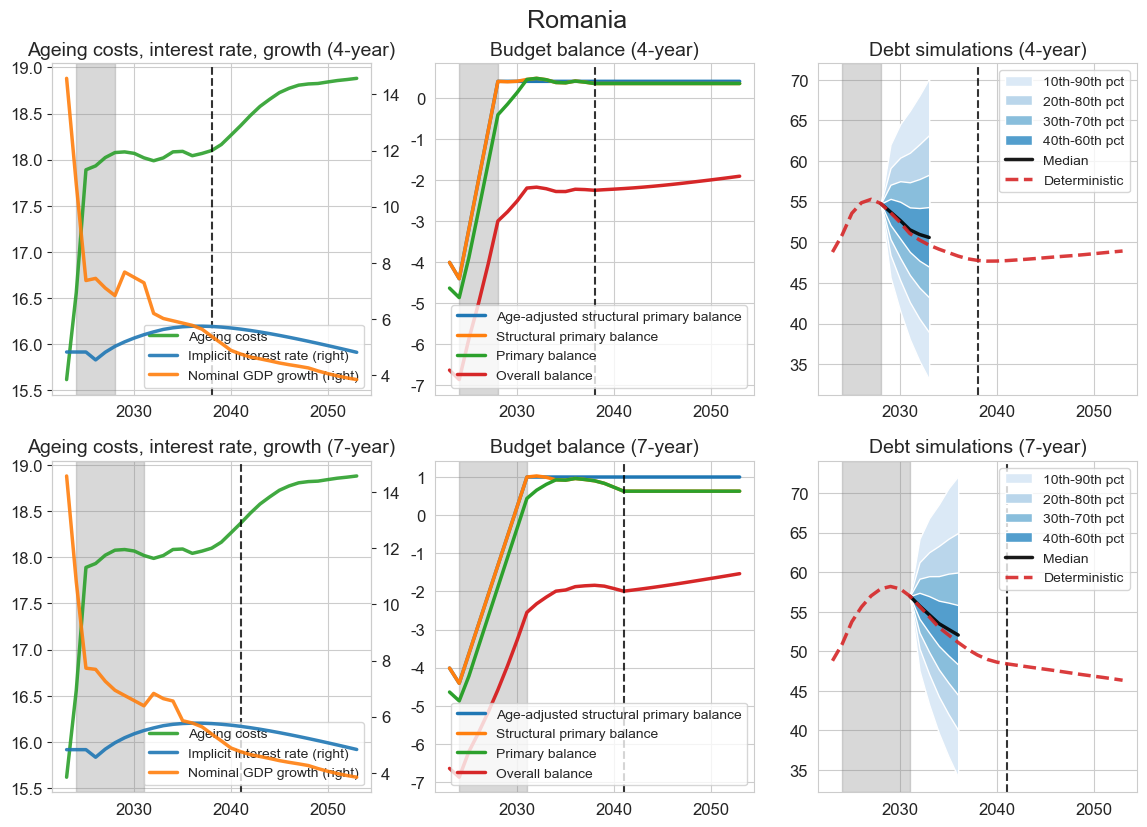

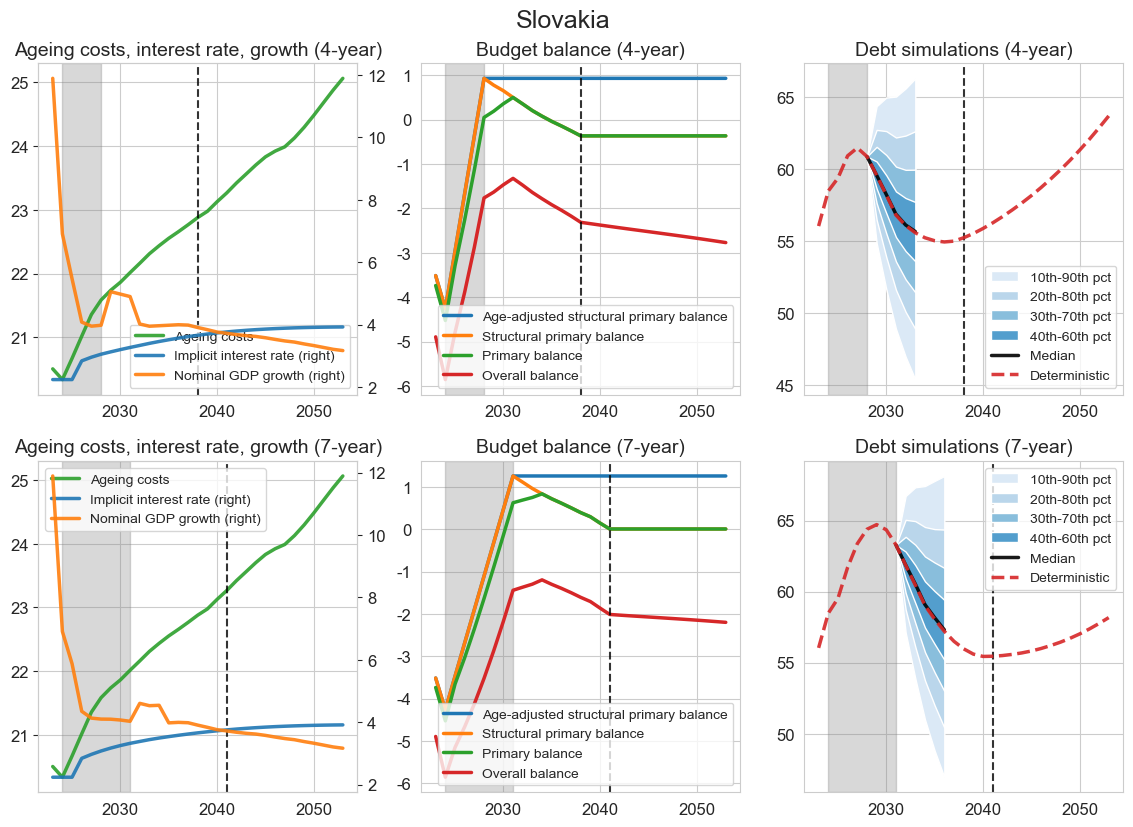

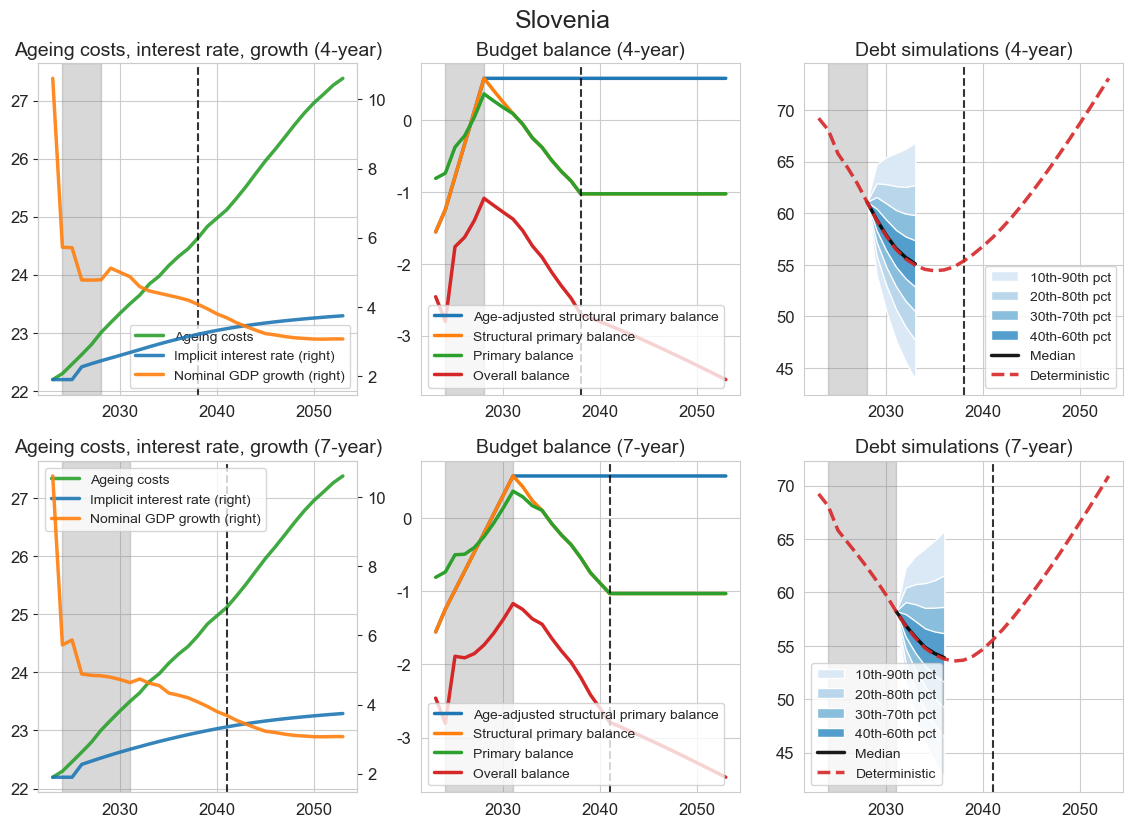

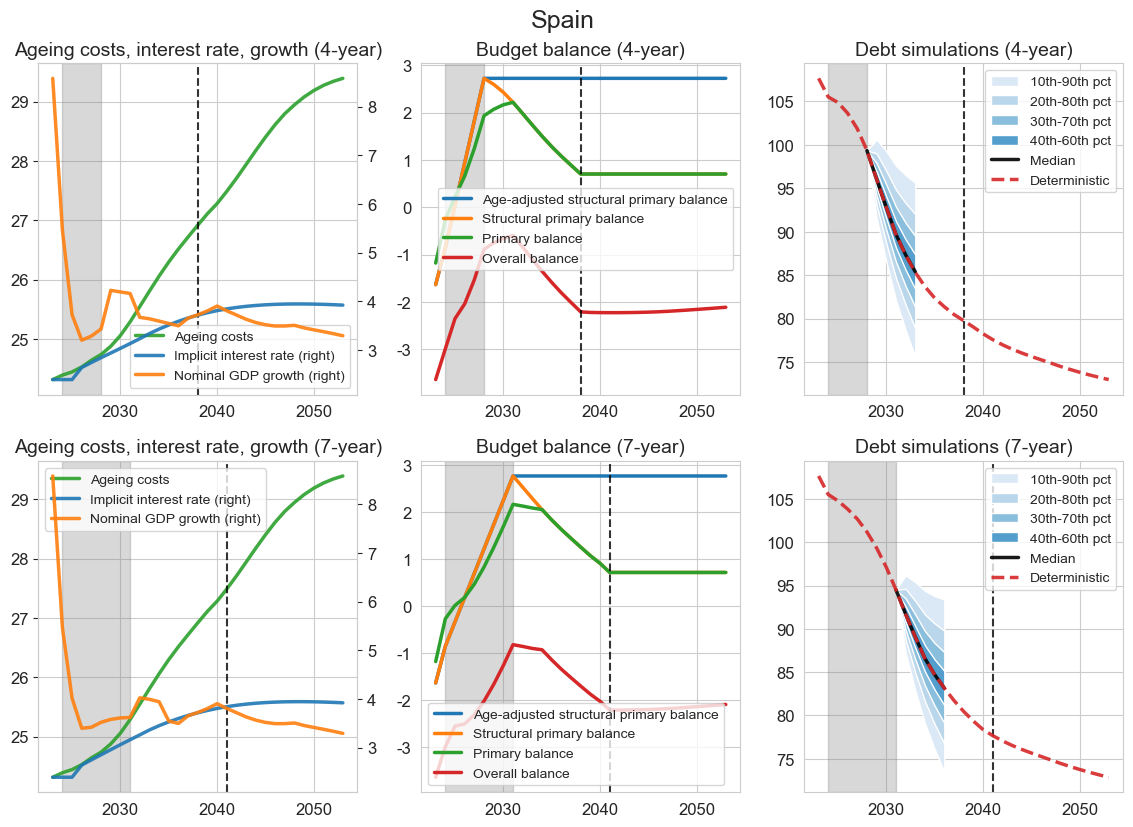

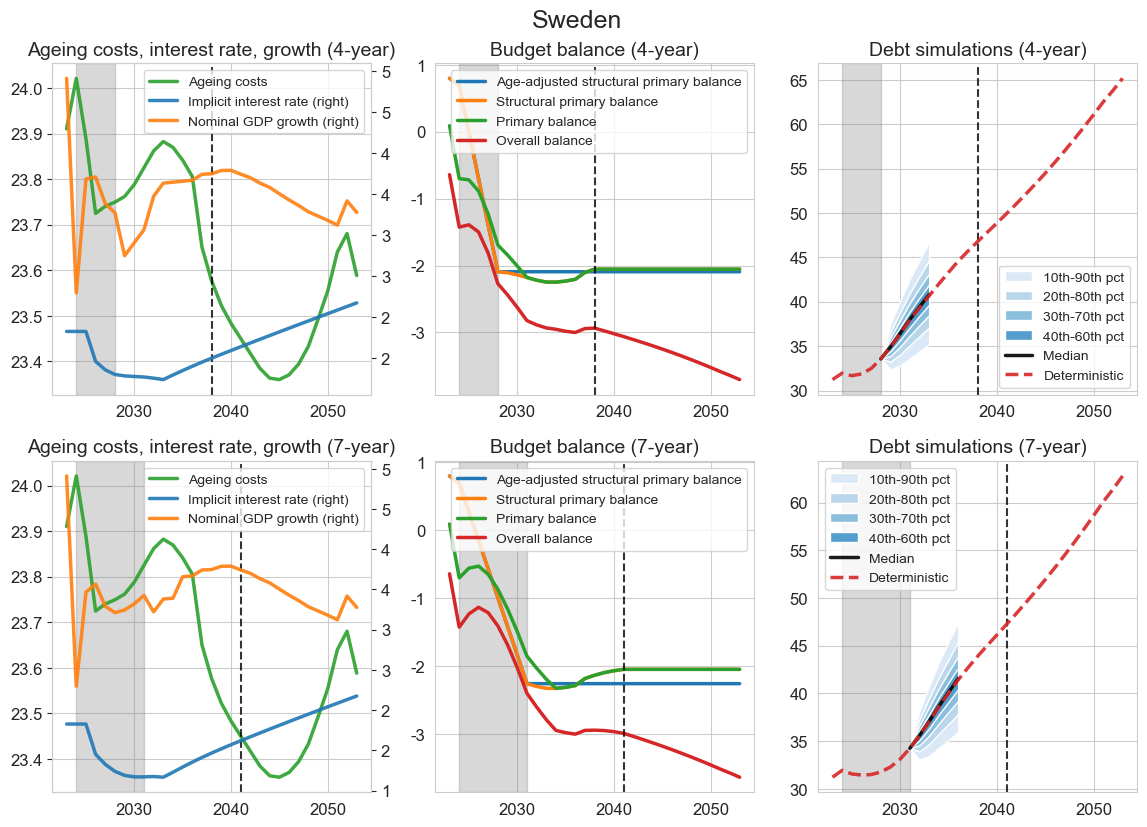

In [35]:
plot_annex_charts(results_dict=results_dict, 
                  folder_name=folder_name, 
                  save_svg=False, 
                  save_png=True
                  )